# Allianz Pricing: From Data Preparation to Risk Modeling Modeling (Modeling Part)

## 1. Feature pre-processing

**[Insert Instructions Below]**

Please cut `VehAge` into 3 categorical bins [0, 1), [1, 10), (10, +inf), store the result in new variable `VehAgeGLM` 

**[Add Context for Task 1]**

The foundation of the premium is to choose a premium as per the risk of the customer. To do this, the risk of the customer seeking insurance, must be estimated. The underlying assumption is that there is a correlation between these variables and the risk.

Feature pre-processing

How to set a reasonable sub-groups (levels) for categorical variables is not always easy. But the main aim is to find as much homogeneity as possible within different class labels (levels) and every class label should receive a sufficient volume of observations. This can be done based on expert opinion or by resorting to some automatic algorithm to seek for homogeneity. 

Feature pre-processing in this section:

`Area`: {A, ..., F} -> {1, ..., 6} (Has been set in previous exploratory data analysis section);

`VehPower`: categorical feature, where we merge vehicle power groups bigger and equal to 9. In total, 6 classes based on expert opinion.

`VehAge`: 3 categorical classes [0, 1), [1, 10), (10, +inf) based on expert opinion;

`DrivAge`: 7 categorical classes [18; 21), [21; 26), [26; 31), [31; 41), [41; 51), [51; 71), [71;+inf) based on expert opinion.

`BonusMalus`: continuous feature component (capping at value 150);

`VehBrand`: categorical feature component (totally 11 classes);

`VehGas`: binary feature component;

`Density`: log-density is chosen as continuous log-linear feature component;

`Region`: categorical feature component (totally 22 classes).

Thus, we consider 3 continuous feature components (`Area`, `BonusMalus`, `log-Density`), 1 binary feature component (`VehGas`) and 5 categorical feature components (`VehPower`, `VehAge`, `DrivAge`, `VehBrand`, `Region`).


## Good to know

This project assumes you have a solid foundation in Python, statistics, and machine learning. Before attempting this project, it is recommended that you complete the prerequisite courses.

### Sample Code

In [6]:
import pandas as pd
import numpy as np
pol_clm_db = pd.read_csv('./datasets/pol_clm_db.csv')

#### Comment
I will first look into the data to see what I have.  I was already familiar from the previous tasks, however there are new variables and we did preprocessing in the first part.
- IdPol and the first column are unique.
- Exposure and ClaimNr are already capped.
- vehicle and driver age are not in  classes.
- The levels of Gas are Regular and Diesel
- brands 12, 1 and 2 are very common.
- No columns have missing values.



In [8]:
# print without scientific notation

def printd(a):
        print('{:.10f}'.format(a))

In [9]:
pol_clm_db.head(2)

,Unnamed: 0,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,LogDensity
0,0,1.0,1,0.10,4,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0,7.0
1,1,3.0,1,0.77,4,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0,7.0


In [10]:
pol_clm_db.describe()

,Unnamed: 0,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,LogDensity
count,678013.000000,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,6.780130e+05,678013.000000
mean,339006.000000,2.621857e+06,0.053179,0.528545,3.289698,6.255635,6.976124,45.496871,59.757211,1792.422405,8.835998e+01,5.956151
std,195725.638368,1.641783e+06,0.237954,0.364081,1.382685,1.603689,5.398963,14.129872,15.607906,3958.646564,5.822454e+03,1.867370
min,0.000000,1.000000e+00,0.000000,0.002732,1.000000,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.000000
25%,169503.000000,1.157951e+06,0.000000,0.180000,2.000000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00,5.000000
50%,339006.000000,2.272152e+06,0.000000,0.490000,3.000000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,6.000000
75%,508509.000000,4.046274e+06,0.000000,0.990000,4.000000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000e+00,7.000000
max,678012.000000,6.114330e+06,4.000000,1.000000,6.000000,9.000000,20.000000,90.000000,150.000000,27000.000000,4.075401e+06,10.000000


In [11]:
pol_clm_db['Unnamed: 0'].duplicated().sum()

0

In [12]:
pol_clm_db['ClaimNb'].sum()

36056

In [13]:
pol_clm_db.columns

Index(['Unnamed: 0', 'IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower',
       'VehAge', 'DrivAge', 'BonusMalus', 'VehBrand', 'VehGas', 'Density',
       'Region', 'ClaimAmount', 'LogDensity'],
      dtype='object')

array([[<AxesSubplot:title={'center':'ClaimNb'}>,
        <AxesSubplot:title={'center':'Exposure'}>,
        <AxesSubplot:title={'center':'Area'}>],
       [<AxesSubplot:title={'center':'VehPower'}>,
        <AxesSubplot:title={'center':'VehAge'}>,
        <AxesSubplot:title={'center':'DrivAge'}>],
       [<AxesSubplot:title={'center':'BonusMalus'}>,
        <AxesSubplot:title={'center':'Density'}>,
        <AxesSubplot:title={'center':'ClaimAmount'}>],
       [<AxesSubplot:title={'center':'LogDensity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

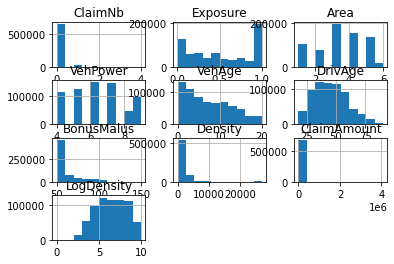

In [14]:
pol_clm_db.hist(['ClaimNb', 'Exposure', 'Area', 'VehPower',
       'VehAge', 'DrivAge', 'BonusMalus', 'Density',
       'ClaimAmount', 'LogDensity'])

In [15]:
#pol_clm_db['VehBrand'].value_counts()
pol_clm_db['VehGas'].value_counts()
#pol_clm_db['Region'].value_counts()



Regular    345877
Diesel     332136
Name: VehGas, dtype: int64

<AxesSubplot:>

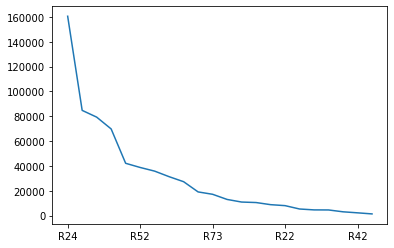

In [16]:
#pol_clm_db['VehBrand'].value_counts().plot()
#pol_clm_db['VehGas'].value_counts().plot()
pol_clm_db['Region'].value_counts().plot()



In [17]:
pol_clm_db[ pol_clm_db.isna().any(axis = 1) ]

,Unnamed: 0,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,LogDensity


VehAge: 3 categorical classes [0, 1), [1, 10), (10, +inf) based on expert opinion;

DrivAge: 7 categorical classes [18; 21), [21; 26), [26; 31), [31; 41), [41; 51), [51; 71), [71;+inf) based on expert opinion.

In [19]:
pol_clm_db['AreaGLM']         = pol_clm_db['Area']
pol_clm_db['VehPowerGLM']     = pol_clm_db['VehPower'].astype("category")
pol_clm_db['VehAgeGLM']       = pd.cut(pol_clm_db['VehAge'], [-np.inf,1, 10, np.inf], right=False)
pol_clm_db['DrivAgeGLM']      = pd.cut(pol_clm_db['DrivAge'], [-np.inf, 21, 26, 31, 41, 51, 71, np.inf], right=False)
pol_clm_db['BonusMalusGLM']   = pol_clm_db['BonusMalus'].astype('int')
pol_clm_db['VehBrandGLM']     = pol_clm_db['VehBrand'].astype("category")
pol_clm_db['VehGasGLM']       = pol_clm_db['VehGas'].astype("category")
pol_clm_db['LogDensityGLM']   = pol_clm_db['LogDensity']
pol_clm_db['RegionGLM']       = pol_clm_db['Region'].astype("category")

## 2. Create response variable for modeling

**[Add Context for Task 2]**

Create response variable for modeling. 

**[Instructions]**

Create response variables for modeling part. Namely, frequency (`Frequency`) , severity (`Severity`), and pure premium (`PurePremium`). Please be careful when calculating the severity as there are lots of cases where number of claim is 0. Also, do the check if there exists any missing value for each explainable variable.


### Sample Code

In [24]:
#1/0

#### Comment
I have not found missing values for any of the three new variables

In [26]:
pol_clm_db['Frequency']   = pol_clm_db['ClaimNb']   * pol_clm_db['Exposure']   
pol_clm_db['Severity']    = 0  
#avoid dividing by 0. sev =  mean claim amount
pol_clm_db.loc[pol_clm_db['ClaimNb'] != 0, 'Severity'] = pol_clm_db['ClaimAmount'] / pol_clm_db['ClaimNb']
pol_clm_db['PurePremium'] = pol_clm_db['Frequency']   * pol_clm_db['Severity']   

In [27]:
pol_clm_db[['Frequency', 'Severity', 'PurePremium']].describe()

,Frequency,Severity,PurePremium
count,678013.000000,6.780130e+05,678013.000000
mean,0.034150,8.175592e+01,51.471395
std,0.173678,5.576590e+03,1965.789071
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000e+00,0.000000
75%,0.000000,0.000000e+00,0.000000
max,4.000000,4.075401e+06,896588.123200


In [28]:
# check missing value
pol_clm_db[['Frequency', 'Severity', 'PurePremium']][ pol_clm_db.isna().any(axis = 1) ]


,Frequency,Severity,PurePremium


In [29]:
pol_clm_db['PurePremium'].fillna(-100)[pol_clm_db['PurePremium']< (-20)]

Series([], Name: PurePremium, dtype: float64)

## 3. Data subsets for modeling

**[Add Context for Task 3]**

In this task, we will focus on creating train/test data sets for modeling.

**[Instructions]**

use `train_test_split` function from module sklearn.model_selection to split the data into training (90%) and testing (10%) (function parameters: test_size=0.1, random_state=210). Check if the resulting split for test and train data looks reasonable (similar) in terms of exposure percentage, claim number percentage, frequency and severity. 

### Sample Code

#### Comment
For severity the bias is more visible, however it is not extreme. This test set can be used.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#help(train_test_split)

In [37]:
trn_db, tst_db = train_test_split(pol_clm_db, test_size=0.1, random_state=210) #210

In [38]:
import matplotlib.pyplot as plt

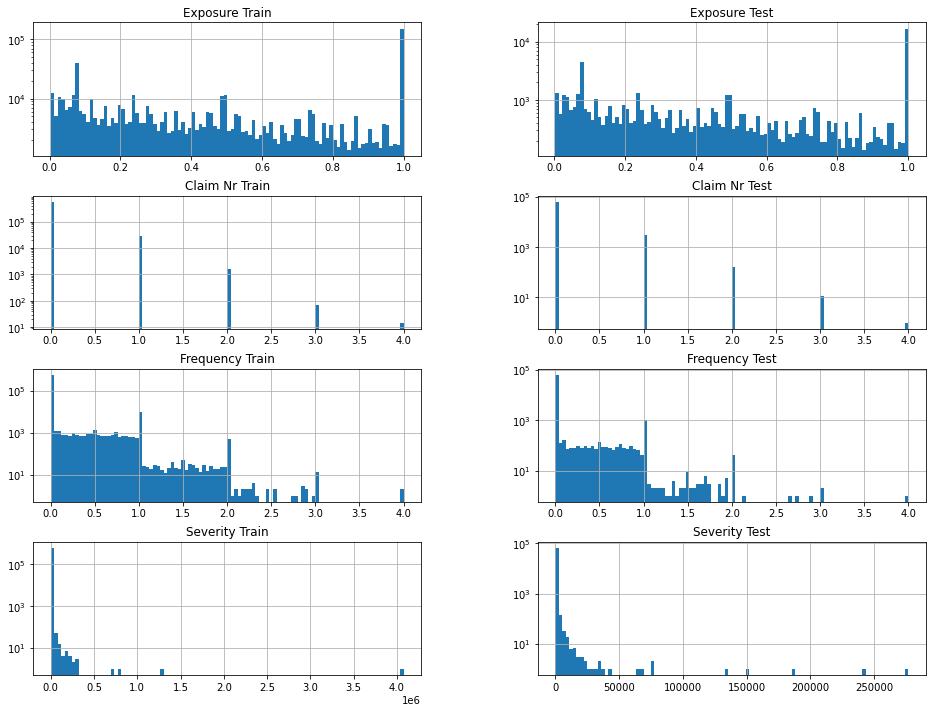

In [39]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,12))

trn_db.hist(column='Exposure', bins=100, log=True, ax=axes[0,0])
tst_db.hist(column='Exposure', bins=100, log=True, ax=axes[0,1])

trn_db.hist(column='ClaimNb', bins=100, log=True, ax=axes[1,0])
tst_db.hist(column='ClaimNb', bins=100, log=True, ax=axes[1,1])

trn_db.hist(column='Frequency', bins=100, log=True, ax=axes[2,0])
tst_db.hist(column='Frequency', bins=100, log=True, ax=axes[2,1])

trn_db.hist(column='Severity', bins=100, log=True, ax=axes[3,0])
tst_db.hist(column='Severity', bins=100, log=True, ax=axes[3,1])

axes[0,0].title.set_text('Exposure Train')
axes[0,1].title.set_text('Exposure Test')
axes[1,0].title.set_text('Claim Nr Train')
axes[1,1].title.set_text('Claim Nr Test')
axes[2,0].title.set_text('Frequency Train')
axes[2,1].title.set_text('Frequency Test')
axes[3,0].title.set_text('Severity Train')
axes[3,1].title.set_text('Severity Test')

### helper code

In [41]:
def split_stat(dat_in, trn_db, tst_db):
    
    # Check resulting split looks reasonable
    return dat_in.assign(  
        # Add indicator columns for whether each row is in_train, in_test
        in_train=dat_in.IDpol.isin(trn_db.IDpol),
        in_test=dat_in.IDpol.isin(tst_db.IDpol),
        # Add column of which subset each row is in
        subset=lambda x: np.select(
            [x.in_train, x.in_test],
            ['train', 'test'],
            default='no_subset')
    ).groupby(  # Group rows by which subset they are in
        ['in_train', 'in_test', 'subset']
    ).agg({  # Calculate stats for each group
        'IDpol': 'size', 'Exposure': 'sum', 'ClaimNb': 'sum', 'ClaimAmount': 'sum'
    }).rename(columns={'IDpol': 'NumOfRows'}).assign(
        # Add additional stats
        NumOfRowsProp = lambda x: x.NumOfRows / x.NumOfRows.sum(),
        ExposureProp  = lambda x: x.Exposure / x.Exposure.sum(),
        ClaimNbProp   = lambda x: x.ClaimNb / x.ClaimNb.sum(),
        Frequency     = lambda x: x.ClaimNb / x.Exposure,
        Severity      = lambda x: x.ClaimAmount / x.ClaimNb
        
    ).pipe(lambda df: df.append(pd.DataFrame.from_dict({
        # Add totals row. It is the sum for every column except 'Frequency', 'Severity'
        # where it is the overall claims frequency of the entire data set
        ('Total','','',''): [
            (lambda x: df.ClaimNb.sum() / df.Exposure.sum() if x == 'Frequency' else df.ClaimAmount.sum() / df.ClaimNb.sum())(col_name) if col_name in ['Frequency', 'Severity']
            else df.loc[:,col_name].sum() for col_name in df.columns
        ]}, orient='index', columns=df.columns
    ))
    ).style.format(  # Format the output so it looks reasonable when printed
        '{:.2%}'  # Default number format
    ).format({  # Specific number formats where we want to override the default
        **{col: '{:,.0f}' for col in ['NumOfRows', 'ClaimNb', 'Severity', 'ClaimAmount']},
        'Exposure': '{:,.1f}'
    })
    


In [42]:
split_stat(pol_clm_db, trn_db, tst_db)

/tmp/ipykernel_425/2341095070.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ).pipe(lambda df: df.append(pd.DataFrame.from_dict({


,,,NumOfRows,Exposure,ClaimNb,ClaimAmount,NumOfRowsProp,ExposureProp,ClaimNbProp,Frequency,Severity
in_train,in_test,subset,,,,,,,,,
False,True,test,"67,802","35,853.3","3,521","5,541,119",0.100001,0.100048,0.097654,0.098206,"1,574"
True,False,train,"610,211","322,506.8","32,535","54,368,097",0.899999,0.899952,0.902346,0.100882,"1,671"
Total,,,"678,013","358,360.1","36,056","59,909,216",1.000000,1.000000,1.000000,0.100614,"1,662"


#### Comment
to compare the distributions I also used the kolmogorov smirnoff test.
distributions for all variables are likely not different


In [44]:
from scipy import stats
c1 = trn_db['Exposure']
c2 = tst_db['Exposure']

stat_v,p_v = stats.ks_2samp(c1,c2)
print(stat_v, p_v)

3.563442627754654e-03 0.41958074466949646


In [45]:
from scipy import stats
c1 = trn_db['ClaimNb']
c2 = tst_db['ClaimNb']

stat_v,p_v = stats.ks_2samp(c1,c2)
print(stat_v, p_v)

1.11493339369928e-03 0.9999991508581351


In [46]:
from scipy import stats
c1 = trn_db['Frequency']
c2 = tst_db['Frequency']

stat_v,p_v = stats.ks_2samp(c1,c2)
print(stat_v, p_v)

1.7834938362291108e-03 0.9899430714992813


In [47]:
from scipy import stats
c1 = trn_db['Severity']
c2 = tst_db['Severity']

stat_v,p_v = stats.ks_2samp(c1,c2)
print(stat_v, p_v)

1.7374986027122175e-03 0.9926480960709435


In [48]:
from scipy import stats
c1 = trn_db['ClaimAmount']
c2 = tst_db['ClaimAmount']

stat_v,p_v = stats.ks_2samp(c1,c2)
print(stat_v, p_v)

1.7260273300570006e-03 0.9932287868740719


## 4 Modeling (Frequency)

**[Add Context for Task 4]**

From previous task, we observe a slight bias in terms of frequency and severity between two data sets, which could be further analyzed w.r.t. the available features (i.e. whether we also have a feature shift), and one could also consider a stratified choice of learning and test data sets. Here, we refrain from doing so.

With the prepared dataset ready, we can safely kick off the modeling part. In the following, we will fit various claim frequency models based on Poisson assumption:

All insurance policies i = 1, 2, ... can be described by independent claim counts $N_i$ having distribution 

$$ N_i \sim Poi (\lambda(x_i) \nu_i) $$

that is, claim counts can be modeled by independent Poisson distributions, and the aim is to estimate (infer) the regression function $\lambda()$, describing the expected frequency w.r.t. exposure $\nu_i$ > 0, from the available data.

**[Instructions]**

Define a function for calculating average poisson deviance (see definition below).

The (scaled) Poisson deviance loss for expected frequency $\lambda > 0 $ is defined by 

$$
\begin{aligned}
D^{*}(\boldsymbol{N}, \lambda) &=\sum_{i=1}^{n} 2 N_{i}\left[\frac{\lambda v_{i}}{N_{i}}-1-\log \left(\frac{\lambda v_{i}}{N_{i}}\right)\right] \geq 0
\end{aligned}
$$

where $N_i$ is the number of claims, $ v_i$ is the exposure, and the $i^{th}$ term is set equal to $2\lambda v_i$ for $N_i = 0$

For fair comparison of results, we define average deviance loss as (scaled) Poisson deviance divided by the number of policy (n), i.e.

$$\frac{D^{*}(\boldsymbol{N}, \lambda)}{n} $$



#### Comment
Mean and variance of ClaimNb are close (likely not overdispersion)

In [53]:
0.237954**2

0.056622106116

In [54]:
pol_clm_db['ClaimNb'].describe()

count    678013.000000
mean          0.053179
std           0.237954
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: ClaimNb, dtype: float64

### Sample Code

In [56]:
# As we are going to compare various models, we create a table which stores the metrics we are going to use for the comparison and the selection of the best model.

mod_res = pd.DataFrame(
    {'model'             : pd.Series(dtype='str'),
     'in_sample_loss'    : pd.Series(dtype='float'),
     'out_sample_loss'   : pd.Series(dtype='float'),
     'aic'               : pd.Series(dtype='float'),
     'in_sample_gini'    : pd.Series(dtype='float'),
     'out_sample_gini'   : pd.Series(dtype='float'),
     'number_of_param'   : pd.Series(dtype='int')
     })
     
# av_poisson_deviance: average possion deviance, which is defined as scaled possion deviance divided by the number of observations
def av_poisson_deviance(y_freq, p_freq, exposure):

    y_freq, p_freq = np.asarray(y_freq), np.asarray(p_freq)
    exposure = np.asarray(exposure)
    
    y = y_freq * exposure
    p = p_freq * exposure
    
    # d = 2 * np.where(y == 0, -(y - p), (y * np.log(y / p)) - (y - p)) 
    # or
    d = 2 * (p - y + 
             np.log(np.power(y/p, y))
             ) 
    
    av_deviance = d.sum()/len(d)

    return(av_deviance)

y_freq_trn   = trn_db['Frequency']
y_trn        = trn_db['ClaimNb']
expo_trn     = trn_db['Exposure']

y_freq_tst   = tst_db['Frequency']
y_tst        = tst_db['ClaimNb']
expo_tst     = tst_db['Exposure']

In [57]:
mod_res

,model,in_sample_loss,out_sample_loss,aic,in_sample_gini,out_sample_gini,number_of_param


y_freq_trn

## 5 GLM0: Homogeneous model 

**[Add Context for Task 5]**

Build first naive GLM model.

**[Instructions]**

Build Homogeneous model, the trivial model where we estimate the global mean and no features are included.

### Sample Code

#### Comment
The general mean with the Poisson Homogeneous model should be close to the overall Frequency given below.  

In [64]:
printd(pol_clm_db['ClaimNb'].sum() / pol_clm_db['Exposure'].sum())

0.1006138782


After running the model, the log B0 is indeed as I expected

In [66]:
printd(np.exp(-2.2938))

0.1008823795


#### Comment
The formula way of defining model (smf.glm) was very helpful, for it's designed to resemble the R way

In [105]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import helper

GLM_freq_homo = smf.glm(
'ClaimNb ~ 1', data = trn_db  , family=sm.families.Poisson(), exposure = trn_db['Exposure']
).fit()

p_freq_trn = np.repeat(np.exp(GLM_freq_homo.params[0]), len(trn_db))
p_freq_tst = np.repeat(np.exp(GLM_freq_homo.params[0]), len(tst_db))

mod_res = helper.store_mod_res(mod_res, GLM_freq_homo, "GLM_freq_homo", y_freq_trn, p_freq_trn, expo_trn, y_freq_tst, p_freq_tst, expo_tst)
print(GLM_freq_homo.summary())
print(mod_res)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               610211
Model:                            GLM   Df Residuals:                   610210
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3213e+05
Date:                Tue, 17 Oct 2023   Deviance:                   2.0173e+05
Time:                        11:57:12   Pearson chi2:                 1.74e+06
No. Iterations:                     7   Pseudo R-squ. (CS):          1.110e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2938      0.006   -413.745      0.0

## 6 GLM1: all feature components considered

**[Add Context for Task 6]**

Build GLM for all features.

**[Instructions]**

Build GLM model for all features included.

### Sample Code

In [1]:
features = ['AreaGLM', 'VehPowerGLM', 'VehAgeGLM', 'DrivAgeGLM', 'BonusMalusGLM', 'VehBrandGLM', 'VehGasGLM', 'LogDensityGLM', 'RegionGLM']
GLM_freq_all = smf.glm('ClaimNb ~ AreaGLM + VehPowerGLM + VehAgeGLM + DrivAgeGLM + BonusMalusGLM + VehBrandGLM + VehGasGLM + LogDensityGLM + RegionGLM', data = trn_db ,  family=sm.families.Poisson(), exposure = trn_db['Exposure']).fit()

p_freq_trn = GLM_freq_all.predict(trn_db)
p_freq_tst = GLM_freq_all.predict(tst_db)

mod_res = helper.store_mod_res(mod_res, GLM_freq_all, "GLM_freq_all", y_freq_trn, p_freq_trn, expo_trn, y_freq_tst, p_freq_tst, expo_tst)

print(GLM_freq_all.summary())
mod_res

NameError: name 'smf' is not defined

## 7 GLM2: drop feature components Area

#### Comment
Taking out the Area from the model results in no increase in the Akaike Criterion. This more parsimonuious model performs as well as the full model, thus preferable

**[Add Context for Task 7]**

A detailed analysis of the output provides that all considered features are significant, except the area code AreaGLM. This can be seen from the p-value, which is above 1%.

**[Instructions]**

Drop the feature 'AreaGLM' and inspect the model result. 

### Sample Code

In [ ]:
feat_exc_area = ['VehPowerGLM', 'VehAgeGLM', 'DrivAgeGLM', 'BonusMalusGLM', 'VehBrandGLM', 'VehGasGLM', 'LogDensityGLM', 'RegionGLM']
GLM_freq_exc_area = smf.glm('ClaimNb ~  VehPowerGLM + VehAgeGLM + DrivAgeGLM + BonusMalusGLM + VehBrandGLM + VehGasGLM + LogDensityGLM + RegionGLM', data = trn_db ,  family=sm.families.Poisson(), exposure = trn_db['Exposure']).fit()

p_freq_trn = GLM_freq_exc_area.predict(trn_db)
p_freq_tst = GLM_freq_exc_area.predict(tst_db)

mod_res = helper.store_mod_res(mod_res, GLM_freq_exc_area, "GLM_freq_exc_area", y_freq_trn, p_freq_trn, expo_trn, y_freq_tst, p_freq_tst, expo_tst)

print(GLM_freq_exc_area.summary())
mod_res

## 8 SBS (standardized binary splits) Regression trees

**[Add Context for Task 8]**

Regression tree models are based on partitioning the feature space in an optimal way to receive (more) homogeneity on the resulting subsets. The optimal partition of the feature space is determined recursively by searching for the stage-wise optimal split among all standardized binary splits (SBS).

Pre-processing for the regression trees in our case, please note that 

1. if there is a natural order in a categorical feature component, then this feature should be replaced by an increasing sequence of real numbers

2. It can be computationally very expensive if we have many (unordered) categorical feature components with many possible values and/or many leaves of the current tree.

3. the pre processing per se won't bring any advantage/disadvantage to the performance of regression trees compared with GLM. It's the other way to rephrase the format of data (no feature engineering involved)


**[Instructions]**

(1) Use `DecisionTreeRegressor` to build a regression tree for claim frequency. Keep in mind that:

- set `ccp_alpha` to be 0.00005. The parameter controls minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. A smaller value gives a bigger tree.

- set `min_samples_leaf` to be 10,000. The parameter set minimum number of samples required to be at a leaf node. Is this value too restrictive? 


(2) In the model `fit()` method, few options are provided, which one would fit our aim (building frequency model). More specifically, how to specify our target variable in Decision Tree Regression when exposure exists.

`fit(X, y, sample_weight=None, check_input=True, X_idx_sorted='deprecated')`

`sample_weight`: array-like of shape (n_samples,), default=None
If None, then samples are equally weighted. Splits that would create child nodes with net zero or negative weight are ignored while searching for a split in each node.


a) DecisionTree.fit(X_trn, ClaimNb, sample_weight=None) 

b) DecisionTree.fit(X_trn, ClaimNb, sample_weight=Exposure) 

c) DecisionTree.fit(X_trn, Frequency, sample_weight=None) 

d) DecisionTree.fit(X_trn, Frequency, sample_weight=Exposure) 


#### Comment
a) does not consider exposure, the risk is not accurately modeled.
d) Exposure is "twice" considered.
b) and c) should be close.

- RT0: Frequency, sample_weight=None)  OK
- RT1: Frequency, sample_weight=Exposure) X
- RT2: ClaimNb, sample_weight=None)  X
- RT3: ClaimNb, sample_weight=Exposure) OK



### Sample Code

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# # one hot encoding for variable VehBrandGLM VehGasGLM RegionGLM as DecisionTreeRegressor can only deal with numerical values
# feat_cnt = ['AreaGLM', 'BonusMalusGLM', 'LogDensityGLM'] # continuous features
# feat_cat  = ['VehPowerGLM', 'VehAgeGLM', 'DrivAgeGLM', 'VehBrandGLM', 'VehGasGLM', 'RegionGLM']

# onehot_coded_trn_db = pd.get_dummies(trn_db[feat_cat])
# onehot_coded_tst_db = pd.get_dummies(tst_db[feat_cat])

# X_trn = pd.concat([trn_db[feat_cnt], onehot_coded_trn_db], axis=1)
# X_tst = pd.concat([tst_db[feat_cnt], onehot_coded_tst_db], axis=1)

# y_trn = trn_db['Frequency']
# y_tst = tst_db['Frequency']

# # criterion = poisson in DecisionTree seems not work very well. So in this case, we use default loss function to split the tree. 
# #The result can be regarded as a good approximation to the optimal split as long as data size is large enough.
# RT0_freq = DecisionTreeRegressor(_______________) 

# RT0_freq.fit(_____________) 

# p_freq_trn = _______________
# p_freq_tst = _______________

# mod_res = helper.store_mod_res(mod_res, RT0_freq, "RT0_freq", y_freq_trn, p_freq_trn, expo_trn, y_freq_tst, p_freq_tst, expo_tst, isGLM=False)
# mod_res


In [ ]:
from sklearn.tree import DecisionTreeRegressor
# one hot encoding for variable VehBrandGLM VehGasGLM RegionGLM as DecisionTreeRegressor can only deal with numerical values
feat_cnt = ['AreaGLM', 'BonusMalusGLM', 'LogDensityGLM'] # continuous features
feat_cat  = ['VehPowerGLM', 'VehAgeGLM', 'DrivAgeGLM', 'VehBrandGLM', 'VehGasGLM', 'RegionGLM']

onehot_coded_trn_db = pd.get_dummies(trn_db[feat_cat])
onehot_coded_tst_db = pd.get_dummies(tst_db[feat_cat])

X_trn = pd.concat([trn_db[feat_cnt], onehot_coded_trn_db], axis=1)
X_tst = pd.concat([tst_db[feat_cnt], onehot_coded_tst_db], axis=1)

y_trn = trn_db['Frequency']
y_tst = tst_db['Frequency']


In [ ]:
y_trn_clnb = trn_db['ClaimNb']
y_tst_clnb = tst_db['ClaimNb']

In [ ]:

# # criterion = poisson in DecisionTree seems not work very well. So in this case, we use default loss function to split the tree. 
# #The result can be regarded as a good approximation to the optimal split as long as data size is large enough.
# RT0_freq = DecisionTreeRegressor(ccp_alpha= 0.00005, min_samples_leaf=10000) 
# RT0_freq.fit(X_trn, y_trn, sample_weight = None) 

# RT1_freq = DecisionTreeRegressor(ccp_alpha= 0.00005, min_samples_leaf=10000) 
# RT1_freq.fit(X_trn, y_trn, sample_weight = trn_db['Exposure']) 

# RT2_freq = DecisionTreeRegressor(ccp_alpha= 0.00005, min_samples_leaf=10000) 
# RT2_freq.fit(X_trn, y_trn_clnb, sample_weight = None) 

# RT3_freq = DecisionTreeRegressor(ccp_alpha= 0.00005, min_samples_leaf=10000) 
# RT3_freq.fit(X_trn, y_trn_clnb, sample_weight = trn_db['Exposure']) 


### >>>> DecisionTreeRegressor(ccp_alpha=5e-05, min_samples_leaf=10000)

In [ ]:
p_freq_trn = RT0_freq.predict(X_trn)
p_freq_tst = RT0_freq.predict(X_tst)

mod_res = helper.store_mod_res(mod_res, RT0_freq, "RT0_freq", y_freq_trn, p_freq_trn, expo_trn, y_freq_tst, p_freq_tst, expo_tst, isGLM=False)
mod_res

In [ ]:
p_freq_trn = RT1_freq.predict(X_trn)
p_freq_tst = RT1_freq.predict(X_tst)
mod_res = helper.store_mod_res(mod_res, RT1_freq, "RT1_freq", y_freq_trn, p_freq_trn, expo_trn, y_freq_tst, p_freq_tst, expo_tst, isGLM=False)

p_freq_trn = RT2_freq.predict(X_trn)
p_freq_tst = RT2_freq.predict(X_tst)
mod_res = helper.store_mod_res(mod_res, RT2_freq, "RT2_freq", y_freq_trn, p_freq_trn, expo_trn, y_freq_tst, p_freq_tst, expo_tst, isGLM=False)

p_freq_trn = RT3_freq.predict(X_trn)
p_freq_tst = RT3_freq.predict(X_tst)
mod_res = helper.store_mod_res(mod_res, RT3_freq, "RT3_freq", y_freq_trn, p_freq_trn, expo_trn, y_freq_tst, p_freq_tst, expo_tst, isGLM=False)

mod_res

## 9 Plot SBS result (No answer required for this question; just read the code and continue the next question)

**[Add Context for Task 9]**

we don't dive too much deep in hyperparameter tunings.

min_samples_leaf: 100000 implies that we only consider SBS such that each leaf receives at least 100000 policies. This choice can be rather restrictive, for instance, the number of policies in training with a bonus-malus level bigger than 100 is 7,029. Requiring at least 10,000 policies in each leaf, the SBS is not able to distinguish different malus levels.


**[Instructions]**

plot the SBS result using function plot_tree

### Sample Code

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
#plot_tree(RT0_freq, feature_names=X_trn.columns, proportion=True)

from sklearn.tree import export_text
r = export_text(RT0_freq, feature_names=X_trn.columns.tolist())
print(r)

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(RT0_freq, filled=True, feature_names=X_trn.columns, rounded=True)
plt.show()

#### Comment
The visualization of the tree with 10000 min_leaves did not return a visual.   Adjusting to min 100 gives a clearer view.
We see that Bonus Malus and Vehicle Brand are the most important factors to split the tree.

In [ ]:
RT4_freq = DecisionTreeRegressor(ccp_alpha= 0.00005, min_samples_leaf=100) 
RT4_freq.fit(X_trn, y_trn_clnb, sample_weight = trn_db['Exposure']) 
plt.figure(figsize=(20,10))
plot_tree(RT4_freq, filled=True, feature_names=X_trn.columns, rounded=True)
plt.show()

r = export_text(RT4_freq, feature_names=X_trn.columns.tolist())
print(r)

In [ ]:
mod_res = helper.store_mod_res(mod_res, RT4_freq, "RT4_freq", y_freq_trn, p_freq_trn, expo_trn, y_freq_tst, p_freq_tst, expo_tst, isGLM=False)

mod_res

In [ ]:
### Extra: grid search cross validationb

In [ ]:
#   st_params)
#{'ccp_alpha': 5e-05, 'min_samples_leaf': 100}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_leaf':[10,50,100,1000,5000,10000],  
    'ccp_alpha': [0.00005, 0.0001, 0.01, ] 

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_trn, y_trn_clnb, sample_weight = trn_db['Exposure'])

best_params = grid_search.best_params_
print(best_params)

## 10 Evaluation of the calibration of prediction

**[Add Context for Task 10]**

(1) VehAge = 0, VehBrand = B12, VehGas = regular gas fuel (not diesel)

|--- VehAgeGLM_[-inf, 1.0) >  0.50
|   |--- VehBrandGLM_B12 >  0.50
|   |   |--- VehGasGLM_Diesel <= 0.50
|   |   |   |--- value: [0.67]


(2) The feature selection and pre-processing has not been done properly for the GLM, in particular, we have not been studying interactions in feature components in GLM. For example, such interactions exist between `VehAge`, `VehBrand` and `VehGas`.

__Business insights__

Thus, there seems to be an issue with new regular fuel cars of brand B12. By a detailed investigation, we find that:

(1) Brand B12 has by far the newest cars (VehAge = 0).
(2) B12 has more than 45,000 cars with an exposure of less than 50 days. This is a sign that many of these car belong to
a car fleet, possibly a car rental company. 


**[Instructions]**

To ensure that estimators yield reasonable predictions for different policyholder types, use function `helper.plot_obs_pred()` to plot observation v.s. model predicted value for variables you have interest in.  



### Sample Code

#### Comment
The model with the variables and data is systematically over estimating the frequency over all risk groups

In [ ]:
helper.plot_obs_pred(
    df=trn_db,
    feature= 'DrivAge',
    weight="Exposure",
    observed="Frequency",
    predicted=GLM_freq_exc_area.predict(trn_db[feat_exc_area]),
    y_label="Claim Frequency",
    title="train data (GLM)"
)

helper.plot_obs_pred(
    df=tst_db,
    feature='DrivAge',
    weight="Exposure",
    observed="Frequency",
    predicted=GLM_freq_exc_area.predict(tst_db[feat_exc_area]),
    y_label="Claim Frequency",
    title="test data (GLM)"
)


## 11 Severity modeling -- Attritional part

**[Add Context for Task 11]**

As the procedure in this section has not big difference from previous one. We won't repeat the work in this part. The mean claim amount or severity can be empirically shown to follow approximately a Gamma distribution.

**[Instructions]**

Build GLM for the attritional severity model:

We fit a GLM model for the severity with the same features (Variable ``AreaGLM`` excluded) as we did in `GLM_exc_area`).



#### Comment

The inverse link which is the default for the Gamma family resulted in negative predictions.  This was fixed by changing the link function to log, since the inverse of log is exp, which is always positive.

The severity attrition model seems appropriate. Every variable is relevant and the predictions are reasonably close to the observed values.

### Sample Code

In [ ]:
threshold = 190_000

mask_trn = (trn_db["ClaimAmount"] > 0) & (trn_db["ClaimAmount"] < threshold)
mask_tst = (tst_db["ClaimAmount"] > 0) & (tst_db["ClaimAmount"] < threshold)
mask_trn_ll = (trn_db["ClaimAmount"] > 0) & (trn_db["ClaimAmount"] >= threshold)
mask_tst_ll = (tst_db["ClaimAmount"] > 0) & (tst_db["ClaimAmount"] >= threshold)

trn_sev_attr_db    = trn_db[mask_trn]
tst_sev_attr_db    = tst_db[mask_tst]
trn_sev_ll_db      = trn_db[mask_trn_ll]
tst_sev_ll_db      = tst_db[mask_tst_ll]

feat_exc_area = ['VehPowerGLM', 'VehAgeGLM', 'DrivAgeGLM', 'BonusMalusGLM', 'VehBrandGLM', 'VehGasGLM', 'LogDensityGLM', 'RegionGLM']

In [ ]:
GLM_sev_exc_area = smf.glm(
  'Severity ~  VehPowerGLM + VehAgeGLM + DrivAgeGLM + BonusMalusGLM + VehBrandGLM + VehGasGLM + LogDensityGLM + RegionGLM', data = trn_sev_attr_db,  family=sm.families.Gamma(link=sm.families.links.log())
 ).fit()

In [ ]:
trn_sev_attr_db['Severity'].describe()

In [ ]:
print(GLM_sev_exc_area.summary())

In [ ]:
p_sev_attr_trn = GLM_sev_exc_area.predict(trn_sev_attr_db )
p_sev_attr_tst = GLM_sev_exc_area.predict(tst_sev_attr_db )

In [ ]:
p_sev_attr_trn.describe()

In [ ]:
helper.plot_obs_pred(
    df=trn_sev_attr_db,
    feature= 'BonusMalusGLM',
    weight="one",
    observed="Severity",
    predicted=GLM_sev_exc_area.predict(trn_sev_attr_db[feat_exc_area]),
    y_label="Claim Severity",
    title="train data (GLM)"
)

helper.plot_obs_pred(
    df=tst_sev_attr_db,
    feature='BonusMalusGLM',
    weight="one",
    observed="Severity",
    predicted=GLM_sev_exc_area.predict(tst_sev_attr_db[feat_exc_area]),
    y_label="Claim Severity",
    title="test data (GLM)"
)


## 12 Large loss part

**[Add Context for Task 12]**

Build GLM for the large loss model.

**[Instructions]**

Build GLM for the large loss model:

- Since we only have 20 large loss claims, it's very difficult to build a reasonable large loss model based on this tiny data set. Therefore, people in this project are recommended to build a flat loading model.

### Sample Code

In [ ]:
# average large loss in train sample
av_excess_ll = np.average(trn_sev_ll_db['ClaimAmount'] - threshold)
prob_ll      = len(trn_sev_ll_db)/(len(trn_sev_ll_db) + len(trn_sev_attr_db))
flat_loading = av_excess_ll * prob_ll

In [ ]:
printd(flat_loading)

In [ ]:
trn_sev_ll_db['ClaimExcess'] = trn_sev_ll_db['ClaimAmount'] - threshold

In [ ]:
GLM_sev_homo = smf.glm(
  'ClaimExcess ~  1', data = trn_sev_ll_db,  family=sm.families.Gamma(link=sm.families.links.log())
 ).fit()

In [ ]:
GLM_sev_homo.summary()

In [ ]:
trn_sev_ll_db

## 13 Model combiner

#### Comment

The average premium for the portfolio is 548 Euro. with a minimum of 362 euro.
Some insureds have an extremely large premium of more than 2500 euros. Most of them are new cars from brand B12, precisely that corresponding to the fleet or car rental. These has to be looked into, to make sure that the high claim frequency of this group doesn't make us the company less competitive in the market for this segment.

This premium can be compared to the market and to the company targets to make any commercial adjustments.

Question, why does the frequency affect the flat loading?

**[Add Context for Task 13]**

Combine frequency and severity model together and caculate predictive pure premium.

**[Instructions]**

Combine 3 models built in previous section together, i.e.

1. `GLM_exc_area`
2. `GLM_sev_exc_area`
3. `flat_loading` for large loss

$$ pure \ premium = freq * (attritional \ cost + flat \ loading) $$


### Sample Code

In [ ]:
p_freq_trn = GLM_freq_exc_area.predict(trn_db)
p_sev_trn = GLM_sev_exc_area.predict(trn_db)



In [ ]:
p_freq_trn.describe()

In [ ]:
p_sev_trn.describe()

In [ ]:
trn_db['PredictiveFrequency']   = p_freq_trn
trn_db['PredictiveSeverity']    = p_sev_trn

trn_db['PredictivePurePremium'] = (trn_db['PredictiveFrequency']  *  trn_db['PredictiveSeverity']) + flat_loading

In [ ]:
trn_db[trn_db['PredictivePurePremium']<1000]['PredictivePurePremium'].hist(bins = 30)

In [ ]:
trn_db['PredictivePurePremium'].describe()

In [ ]:
trn_db[trn_db['PredictivePurePremium']>2500]['VehBrand'].value_counts()


#### COMMENT
GINI: Higher gini indicates better discriminative ability of the model.  If differnce too large betwen train test there is likely overfitting

